In [49]:
def calculate_direct_energy(energies, N):
    """
    Calcola l'energia media diretta U(β) per un set di dati.
    
    Parametri:
    - energies: Lista o array delle energie totali raccolte durante la simulazione.
    - N: Numero di particelle nel sistema.

    Ritorna:
    - Energia media U(β)
    - Energia media per particella u(β)
    """
    # Calcola l'energia media totale
    U_beta = np.mean(energies)
    
    # Calcola l'energia media per particella
    u_beta = U_beta / N
    
    return U_beta, u_beta

# Esempio di utilizzo
energies_at_beta_k = data[key][config]['energies']  # Le energie della simulazione a un dato β_k
N = 25  # Numero di particelle nel sistema (esempio)
U_beta_k, u_beta_k = calculate_direct_energy(energies_at_beta_k, N)

print(f"U(β) = {U_beta_k}, u(β) = {u_beta_k}")


U(β) = -299.33514, u(β) = -11.973405600000001


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def single_histogram_method(energies, beta_i, beta_values):
    """
    Applica il metodo dell'istogramma singolo per stimare <E> a diverse beta.
    
    Parametri:
    - energies: Lista delle energie raccolte a beta_i
    - beta_i: Valore di beta (T=1/beta) alla quale sono stati raccolti i dati
    - beta_values: Lista di valori di beta per cui calcolare <E>
    
    Ritorna:
    - A dictionary con i valori stimati di <E> per ogni beta in beta_values
    """
    extrapolated_U = {}

    for beta in beta_values:
        exp_factor = np.exp(-(beta - beta_i) * np.array(energies))
        
        # Energia media estrapolata
        avg_energy = np.sum(energies * exp_factor) / np.sum(exp_factor)
        extrapolated_U[beta] = avg_energy
    
    return extrapolated_U

def calculate_direct_energy(energies, N):
    """
    Calcola l'energia media diretta U(β) per un set di dati.
    
    Parametri:
    - energies: Lista o array delle energie totali raccolte durante la simulazione.
    - N: Numero di particelle nel sistema.

    Ritorna:
    - Energia media U(β)
    - Energia media per particella u(β)
    """
    # Calcola l'energia media totale
    U_beta = np.mean(energies)
    
    # Calcola l'energia media per particella
    u_beta = U_beta / N
    
    return U_beta, u_beta

def plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values):
    """
    Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente.
    
    Parametri:
    - extrapolated_U: Valori di energia estrapolati con il metodo dell'istogramma singolo.
    - beta_values: Lista dei valori di beta per l'estrapolazione.
    - direct_U: Valori diretti di energia calcolati.
    - beta_direct_values: Lista dei valori di beta per i dati diretti.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot energia estrapolata
    plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='b')
    
    # Plot energia calcolata direttamente
    plt.plot(beta_direct_values, direct_U, label='Direct U(β)', marker='x', color='r')
    
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\langle E \rangle_{\beta}$')
    plt.title('Extrapolated vs Direct Internal Energy U(β)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Esempio di applicazione del metodo
beta_i = float(1 / 2.5)  # Valore di beta_i (T=2.0)
beta_values = np.arange(1 / 3.5, 1 / 1.0, 50)  # Valori di beta per l'estrapolazione

# Filtriamo i dati per un caso specifico (es. T=2.0, N=25 e configurazione random)
key = 'T2.5_N25'
config = 'random'
data_at_beta_i =pd.DataFrame(data[key][config] ) # Ottieni i dati dell'energia a beta_i
energies_betai=data_at_beta_i['energies']
N = 25  # Numero di particelle
print(energies_at_beta_i.head())
# Applica il metodo dell'istogramma singolo
extrapolated_U = single_histogram_method(energies_betai, beta_i, beta_values)

# Ora calcola U(β) direttamente dai dati a diversi valori di β
direct_U = []
beta_direct_values = [1 / 1.0, 1 / 2.5, 1 / 3.5]  # β corrispondenti alle temperature selezionate



# Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente
plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values)


TypeError: string indices must be integers

In [34]:
import pandas as pd
from io import StringIO

# Testo dei dati
data1 = """
T\tN\taverage_magnetization\taverage_energy\tspecific_heat\tsusceptibility
0\t1.0\t25\t0.999447\t-1248.624359\t0.449979\t7.340889e-08
1\t1.0\t50\t0.999322\t-4993.415261\t1.368091\t1.613329e-08
2\t1.0\t100\t0.990969\t-19702.546933\t184.173583\t2.016017e-07
3\t2.5\t25\t0.671540\t-746.666512\t28.838846\t5.355105e-05
4\t2.5\t50\t0.634315\t-2822.266821\t318.731737\t4.285287e-05
5\t2.5\t100\t0.604181\t-10684.467967\t116.925853\t7.251212e-07
6\t3.5\t25\t0.241111\t-297.256279\t7.597408\t4.800594e-05
7\t3.5\t50\t0.255483\t-1229.930011\t19.105655\t6.623164e-06
8\t3.5\t100\t0.237093\t-4699.664100\t22.138560\t4.740411e-07
"""

# Usa StringIO per trattare il testo come un file
data_io = StringIO(data)

# Leggi il DataFrame
df = pd.read_csv(data_io, sep='\t')

# Mostra il DataFrame
df


,T,N,average_magnetization,average_energy,specific_heat,susceptibility
0,1.0,25,0.999447,-1248.624359,0.449979,7.340889e-08
1,1.0,50,0.999322,-4993.415261,1.368091,1.613329e-08
2,1.0,100,0.990969,-19702.546933,184.173583,2.016017e-07
3,2.5,25,0.671540,-746.666512,28.838846,5.355105e-05
4,2.5,50,0.634315,-2822.266821,318.731737,4.285287e-05
5,2.5,100,0.604181,-10684.467967,116.925853,7.251212e-07
6,3.5,25,0.241111,-297.256279,7.597408,4.800594e-05
7,3.5,50,0.255483,-1229.930011,19.105655,6.623164e-06
8,3.5,100,0.237093,-4699.664100,22.138560,4.740411e-07


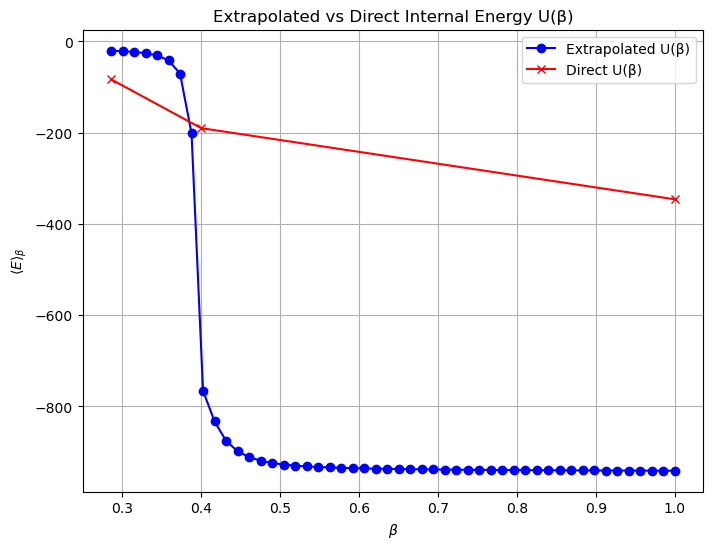

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Testo dei dati
data1 = """
T\tN\taverage_magnetization\taverage_energy\tspecific_heat\tsusceptibility
0\t1.0\t25\t0.999447\t-1248.624359\t0.449979\t7.340889e-08
1\t1.0\t50\t0.999322\t-4993.415261\t1.368091\t1.613329e-08
2\t1.0\t100\t0.990969\t-19702.546933\t184.173583\t2.016017e-07
3\t2.5\t25\t0.671540\t-746.666512\t28.838846\t5.355105e-05
4\t2.5\t50\t0.634315\t-2822.266821\t318.731737\t4.285287e-05
5\t2.5\t100\t0.604181\t-10684.467967\t116.925853\t7.251212e-07
6\t3.5\t25\t0.241111\t-297.256279\t7.597408\t4.800594e-05
7\t3.5\t50\t0.255483\t-1229.930011\t19.105655\t6.623164e-06
8\t3.5\t100\t0.237093\t-4699.664100\t22.138560\t4.740411e-07
"""

# Usa StringIO per trattare il testo come un file
data_io = StringIO(data1)

# Leggi il DataFrame
df = pd.read_csv(data_io, sep='\t')

def single_histogram_method(energies, beta_i, beta_values):
    """
    Applica il metodo dell'istogramma singolo per stimare <E> a diverse beta.
    """
    extrapolated_U = {}

    for beta in beta_values:
        exp_factor = np.exp(-(beta - beta_i) * np.array(energies))
        
        # Energia media estrapolata
        avg_energy = np.sum(energies * exp_factor) / np.sum(exp_factor)
        extrapolated_U[beta] = avg_energy
    
    return extrapolated_U

def calculate_direct_energy(energies, N):
    """
    Calcola l'energia media diretta U(β) per un set di dati.
    """
    U_beta = np.mean(energies)
    u_beta = U_beta / N
    return U_beta, u_beta

def plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values):
    """
    Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot energia estrapolata
    plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='b')
    
    # Plot energia calcolata direttamente
    plt.plot(beta_direct_values, direct_U, label='Direct U(β)', marker='x', color='r')
    
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\langle E \rangle_{\beta}$')
    plt.title('Extrapolated vs Direct Internal Energy U(β)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Esempio di applicazione del metodo
beta_i = 1 / 2.5  # Valore di beta_i (T=2.5)
beta_values = np.linspace(1 / 3.5, 1 / 1.0, 50)  # Valori di beta per l'estrapolazione

# Filtriamo i dati per un caso specifico (T=2.5, N=25 e configurazione random)
N = 25  # Numero di particelle

key = 'T2.5_N25'
config = 'random'
data_at_beta_i = pd.DataFrame(data[key][config])  # Ottieni i dati dell'energia a beta_i
energies_betai = data_at_beta_i['energies'].values

# Applica il metodo dell'istogramma singolo
extrapolated_U = single_histogram_method(energies_betai, beta_i, beta_values)

# Calcola U(β) direttamente dai dati per diversi valori di β
direct_U = []
beta_direct_values = [1 / 1.0, 1 / 2.5, 1 / 3.5]  # β corrispondenti alle temperature selezionate

for beta_direct in beta_direct_values:
    temp = 1 / beta_direct
    temp_data = df[(df['T'] == temp)]
    if not temp_data.empty:
        energies_at_beta = temp_data['average_energy'].values/N
        U_beta, _ = calculate_direct_energy(energies_at_beta, N)  # Calcola U(β)
        direct_U.append(U_beta)

# Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente
plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values)


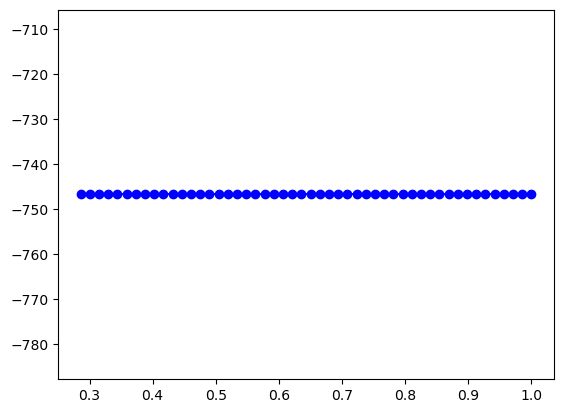

In [41]:
plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='b')






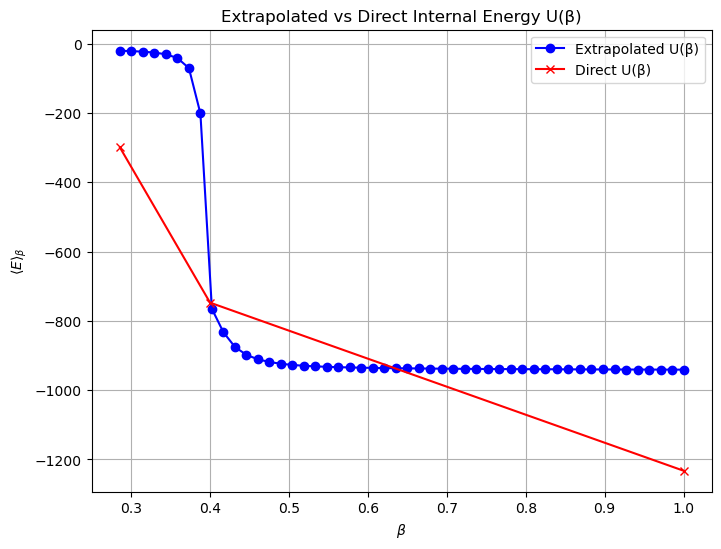

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def single_histogram_method(energies, beta_i, beta_values):
    """
    Applica il metodo dell'istogramma singolo per stimare <E> a diverse beta.
    """
    extrapolated_U = {}

    for beta in beta_values:
        exp_factor = np.exp(-(beta - beta_i) * np.array(energies))
        
        # Energia media estrapolata
        avg_energy = np.sum(energies * exp_factor) / np.sum(exp_factor)
        extrapolated_U[beta] = avg_energy
    
    return extrapolated_U

def calculate_direct_energy(energies, N):
    """
    Calcola l'energia media diretta U(β) per un set di dati.
    """
    U_beta = np.mean(energies)
    u_beta = U_beta /N
    return U_beta, u_beta

def plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values):
    """
    Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot energia estrapolata
    plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='b')
    
    # Plot energia calcolata direttamente
    plt.plot(beta_direct_values, direct_U, label='Direct U(β)', marker='x', color='r')
    
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\langle E \rangle_{\beta}$')
    plt.title('Extrapolated vs Direct Internal Energy U(β)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Esempio di applicazione del metodo
beta_i = float(1 / 2.5)  # Valore di beta_i (T=2.5)
beta_values = np.linspace(1 / 3.5, 1 / 1.0, 50)  # Valori di beta per l'estrapolazione

# Filtriamo i dati per un caso specifico (T=2.5, N=25 e configurazione random)
key = 'T2.5_N25'
config = 'random'
data_at_beta_i = pd.DataFrame(data[key][config])  # Ottieni i dati dell'energia a beta_i
energies_betai = data_at_beta_i['energies'].values  # Converti in array
N = 25  # Numero di particelle

# Applica il metodo dell'istogramma singolo
extrapolated_U = single_histogram_method(energies_betai, beta_i, beta_values)

# Calcola U(β) direttamente dai dati per diversi valori di β
direct_U = []
beta_direct_values = [1 / 1.0, 1 / 2.5, 1 / 3.5]  # β corrispondenti alle temperature selezionate

for beta_direct in beta_direct_values:
    temp_key = f'T{1/beta_direct:.1f}_N{N}'  # Costruisci la chiave con la corrispondente temperatura
    if temp_key in data:
        energies_at_beta = pd.DataFrame(data[temp_key][config])['energies'].values
        U_beta, _ = calculate_direct_energy(energies_at_beta, 25*25)  # Calcola U(β)
        direct_U.append(U_beta)

# Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente
plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values)

----

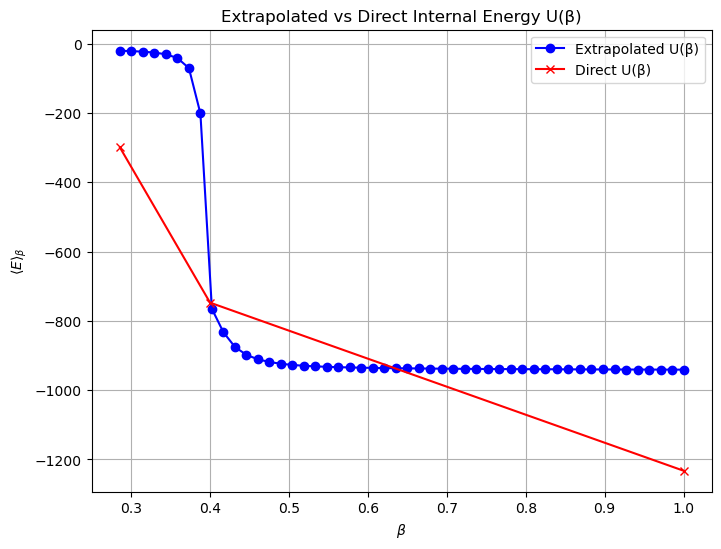

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def multiple_histogram_method(df, beta_values):
    """
    Applica il metodo dei multipli istogrammi per stimare <E> a diverse beta.
    """
    extrapolated_U = {}
    
    for beta in beta_values:
        exp_sum = 0
        norm_sum = 0
        
        for temp in df['T'].unique():
            beta_i = 1 / temp
            energies = df[df['T'] == temp]['average_energy'].values
            exp_factor = np.exp(-(beta - beta_i) * np.array(energies))
            exp_sum += np.sum(exp_factor * energies)
            norm_sum += np.sum(exp_factor)
        
        avg_energy = exp_sum / norm_sum
        extrapolated_U[beta] = avg_energy
    
    return extrapolated_U

def calculate_direct_energy(energies, N):
    """
    Calcola l'energia media diretta U(β) per un set di dati.
    """
    U_beta = np.mean(energies)
    u_beta = U_beta /N
    return U_beta, u_beta

def plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values):
    """
    Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot energia estrapolata
    plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='b')
    
    # Plot energia calcolata direttamente
    plt.plot(beta_direct_values, direct_U, label='Direct U(β)', marker='x', color='r')
    
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\langle E \rangle_{\beta}$')
    plt.title('Extrapolated vs Direct Internal Energy U(β)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Esempio di applicazione del metodo
beta_i = float(1 / 2.5)  # Valore di beta_i (T=2.5)
beta_values = np.linspace(1 / 3.5, 1 / 1.0, 50)  # Valori di beta per l'estrapolazione

# Filtriamo i dati per un caso specifico (T=2.5, N=25 e configurazione random)
key = 'T2.5_N25'
config = 'random'
data_at_beta_i = pd.DataFrame(data[key][config])  # Ottieni i dati dell'energia a beta_i
energies_betai = data_at_beta_i['energies'].values  # Converti in array
N = 25  # Numero di particelle

# Applica il metodo dell'istogramma singolo
extrapolated_U = single_histogram_method(energies_betai, beta_i, beta_values)

# Calcola U(β) direttamente dai dati per diversi valori di β
direct_U = []
beta_direct_values = [1 / 1.0, 1 / 2.5, 1 / 3.5]  # β corrispondenti alle temperature selezionate

for beta_direct in beta_direct_values:
    temp_key = f'T{1/beta_direct:.1f}_N{N}'  # Costruisci la chiave con la corrispondente temperatura
    if temp_key in data:
        energies_at_beta = pd.DataFrame(data[temp_key][config])['energies'].values
        U_beta, _ = calculate_direct_energy(energies_at_beta, 25*25)  # Calcola U(β)
        direct_U.append(U_beta)

# Visualizza il confronto tra l'energia estrapolata e quella calcolata direttamente
plot_extrapolated_energy(extrapolated_U, beta_values, direct_U, beta_direct_values)

---
rifacciamo questi due metodi

/var/folders/_b/dwnrhdgd0y7_7nj2zgdrqt6m0000gq/T/ipykernel_78908/1910634104.py:19: RuntimeWarning: overflow encountered in exp
  exp_factor =np.exp(-(beta - beta_i) * np.array(energies))
/var/folders/_b/dwnrhdgd0y7_7nj2zgdrqt6m0000gq/T/ipykernel_78908/1910634104.py:22: RuntimeWarning: overflow encountered in multiply
  avg_energy = np.sum(energies * exp_factor) / np.sum(exp_factor)
/Users/annagarbo1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/_b/dwnrhdgd0y7_7nj2zgdrqt6m0000gq/T/ipykernel_78908/1910634104.py:22: RuntimeWarning: invalid value encountered in double_scalars
  avg_energy = np.sum(energies * exp_factor) / np.sum(exp_factor)


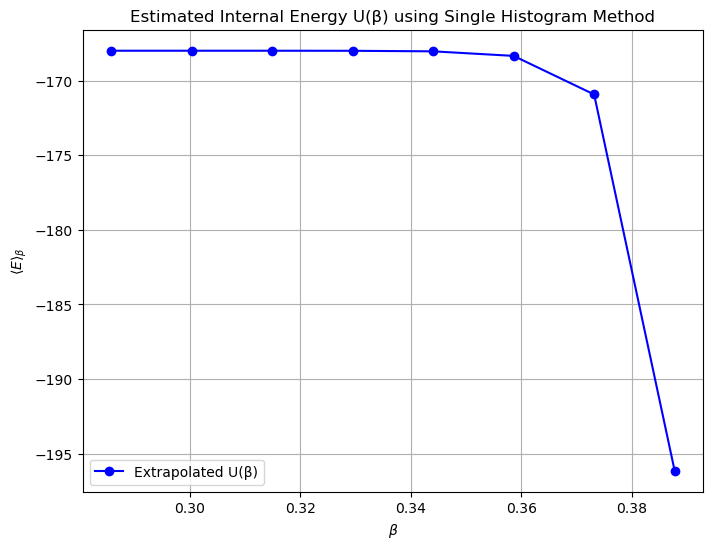

[-1.6800000e+02 -3.1400000e+02 -4.7600000e+02 ... -1.4870440e+07
 -1.4870588e+07 -1.4870736e+07]


In [111]:
import numpy as np
import matplotlib.pyplot as plt

def single_histogram_method(energies, beta_i, beta_values):
    """
    Applica il metodo dell'istogramma singolo per stimare <E> a diverse beta.
    
    Parametri:
    - energies: Lista delle energie raccolte a beta_i
    - beta_i: Valore di beta (T=1/beta) alla quale sono stati raccolti i dati
    - beta_values: Lista di valori di beta per cui calcolare <E>
    
    Ritorna:
    - A dictionary con i valori stimati di <E> per ogni beta in beta_values
    """
    extrapolated_U = {}

    for beta in beta_values:
        exp_factor =np.exp(-(beta - beta_i) * np.array(energies))
        
        # Energia media estrapolata
        avg_energy = np.sum(energies * exp_factor) / np.sum(exp_factor)
        extrapolated_U[beta] = avg_energy
    
    return extrapolated_U

def load_energy_data(file_path):
    """
    Carica i dati di energia da un file e restituisce un array di energie.
    
    Parametri:
    - file_path: Il percorso del file che contiene i dati di energia.
    
    Ritorna:
    - Un array di energie.
    """
    data = np.loadtxt(file_path)
    energies = data[:,1]  # Supponendo che la seconda colonna contenga le energie
    return energies

def plot_extrapolated_energy(extrapolated_U, beta_values):
    """
    Visualizza l'energia stimata a diverse temperature.
    
    Parametri:
    - extrapolated_U: Valori di energia estrapolati con il metodo dell'istogramma singolo.
    - beta_values: Lista dei valori di beta per l'estrapolazione.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot energia estrapolata
    plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='b')
    
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\langle E \rangle_{\beta}$')
    plt.title('Estimated Internal Energy U(β) using Single Histogram Method')
    plt.legend()
    plt.grid(True)
    plt.show()

# Carica i dati di energia a T=2.5
energy_file_path = 'energy_evolution_T2.5.txt'
energies_betai = load_energy_data(energy_file_path)
beta_i = 1 / 2.5

# Definisci i valori di beta per cui calcolare l'energia
beta_values = np.linspace(1 / 3.5, 1 / 1.0, 50)  # Modifica l'intervallo come necessario

# Applica il metodo dell'istogramma singolo
extrapolated_U = single_histogram_method(energies_betai, beta_i, beta_values)

# Visualizza i risultati
plot_extrapolated_energy(extrapolated_U, beta_values)
print(energies_betai)

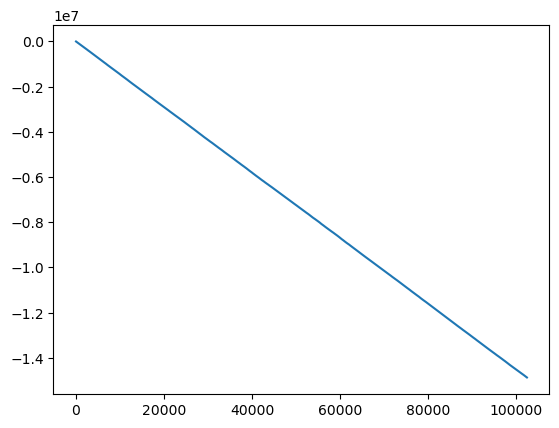

In [112]:
data = np.loadtxt('energy_evolution_T2.5.txt')
timestep = data[:,0] 
plt.plot(timestep,energies_betai)

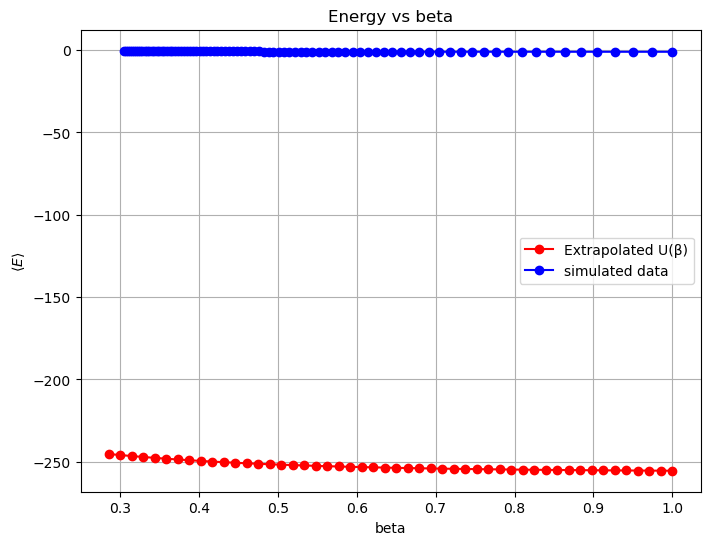

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def load_energy_data(file_path):
    """
    Carica i dati di energia e temperatura da un file e restituisce due array.
    
    Parametri:
    - file_path: Il percorso del file che contiene i dati di energia e temperatura.
    
    Ritorna:
    - temperature: Array delle temperature.
    - energies: Array delle energie.
    """
    data = np.loadtxt(file_path)
    temperature = data[:, 0]  # Prima colonna: temperatura
    energies = data[:, 1]    # Seconda colonna: energia
    return temperature, energies

# Carica i dati di energia
energy_file_path = 'energy.txt'
temperature, energies = load_energy_data(energy_file_path)
beta=1/temperature
    
plt.figure(figsize=(8, 6))
plt.plot(beta_values, [extrapolated_U[beta] for beta in beta_values], label='Extrapolated U(β)', marker='o', color='r')
plt.plot(beta, energies, marker='o', linestyle='-', color='b',label='simulated data')
plt.legend()   
plt.xlabel('beta')
plt.ylabel(r'$\langle E \rangle$')
plt.title('Energy vs beta')
plt.grid(True)
plt.show()




---
umbrella sampling

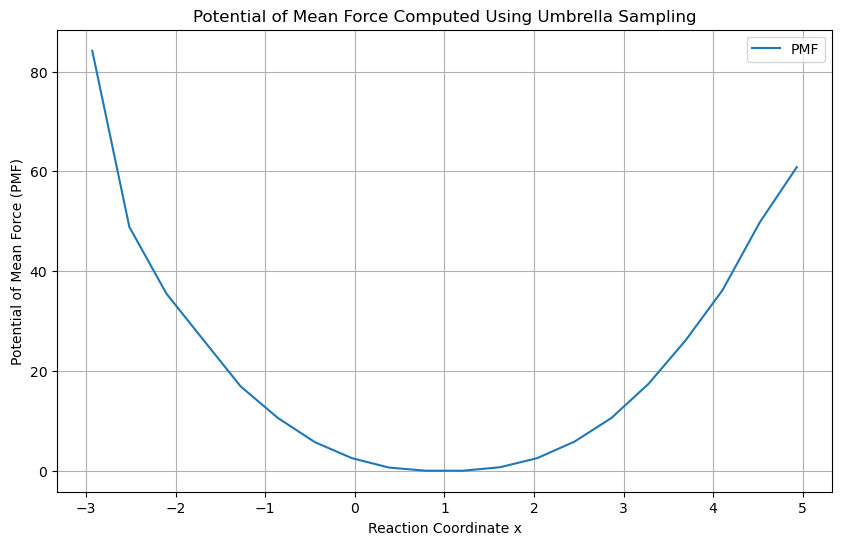

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a simple potential function
def potential(x):
    return 0.5 * (x - 1)**2

# Harmonic bias function
def harmonic_bias(x, x0, k):
    return 0.5 * k * (x - x0)**2

# Define the reaction coordinate and umbrella windows
x_windows = np.linspace(0.5, 1.5, 10)
k = 10  # Force constant for the harmonic bias

# Function to simulate umbrella sampling
def umbrella_sampling(x_windows, num_samples=1000):
    x_samples = []
    biases = []
    for x0 in x_windows:
        x = np.random.normal(loc=x0, scale=1.0, size=num_samples)
        bias = harmonic_bias(x, x0, k)
        x_samples.append(x)
        biases.append(bias)
    return np.concatenate(x_samples), np.concatenate(biases)

# Perform umbrella sampling
x, biases = umbrella_sampling(x_windows)

# Compute weighted histogram
hist, bin_edges = np.histogram(x, bins=20, weights=np.exp(-biases))
hist_density = hist / np.sum(hist)

# Define a function to fit the potential energy curve
def fit_potential(x, a, b, c):
    return a * (x - b)**2 + c

# Fit the potential energy to the histogram
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, _ = curve_fit(fit_potential, bin_centers, hist_density)

# Compute PMF
pmf = -np.log(hist_density / np.max(hist_density))  # Normalize PMF
pmf -= np.min(pmf)  # Shift PMF to start at zero

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pmf, label='PMF')
plt.xlabel('Reaction Coordinate x')
plt.ylabel('Potential of Mean Force (PMF)')
plt.title('Potential of Mean Force Computed Using Umbrella Sampling')
plt.legend()
plt.grid(True)
plt.show()
